<a href="https://colab.research.google.com/github/mohitsaini1166/Machine-Learning-Projects/blob/main/2%F0%9F%8F%A5HOSPITAL_STROKE_PREDICTION_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***🏥HOSPITAL STROKE PREDICTION DATA***

In [1]:
from google.colab import files
uploaded =  files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


#***⚡Import all libraries***

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#***⚡Upload dataset***

In [3]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#***⚡Overview the Data***

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#***⚡Data Cleaning Steps***

In [5]:
#Check Missing Values
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [6]:
# Fill missing BMI values with the median
df["bmi"].fillna(df["bmi"].median(), inplace=True)

<ipython-input-6-8bb34537a77f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bmi"].fillna(df["bmi"].median(), inplace=True)


In [7]:
# Check unique values in categorical columns
categorical_columns = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
unique_values = {col: df[col].unique() for col in categorical_columns}

# Verify if missing values still exist
missing_values_after = df.isnull().sum()


unique_values, missing_values_after


({'gender': array(['Male', 'Female', 'Other'], dtype=object),
  'ever_married': array(['Yes', 'No'], dtype=object),
  'work_type': array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
        dtype=object),
  'Residence_type': array(['Urban', 'Rural'], dtype=object),
  'smoking_status': array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
        dtype=object)},
 id                   0
 gender               0
 age                  0
 hypertension         0
 heart_disease        0
 ever_married         0
 work_type            0
 Residence_type       0
 avg_glucose_level    0
 bmi                  0
 smoking_status       0
 stroke               0
 dtype: int64)

In [8]:
#Check Duplicate values
df.duplicated().sum()

0

# ***⚡Visualization Steps***

<ipython-input-9-16c3db36ca78>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="stroke", data=df, palette="coolwarm", ax=axes[0])
<ipython-input-9-16c3db36ca78>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["No Stroke", "Stroke"])
<ipython-input-9-16c3db36ca78>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["Male", "Female", "Other"])


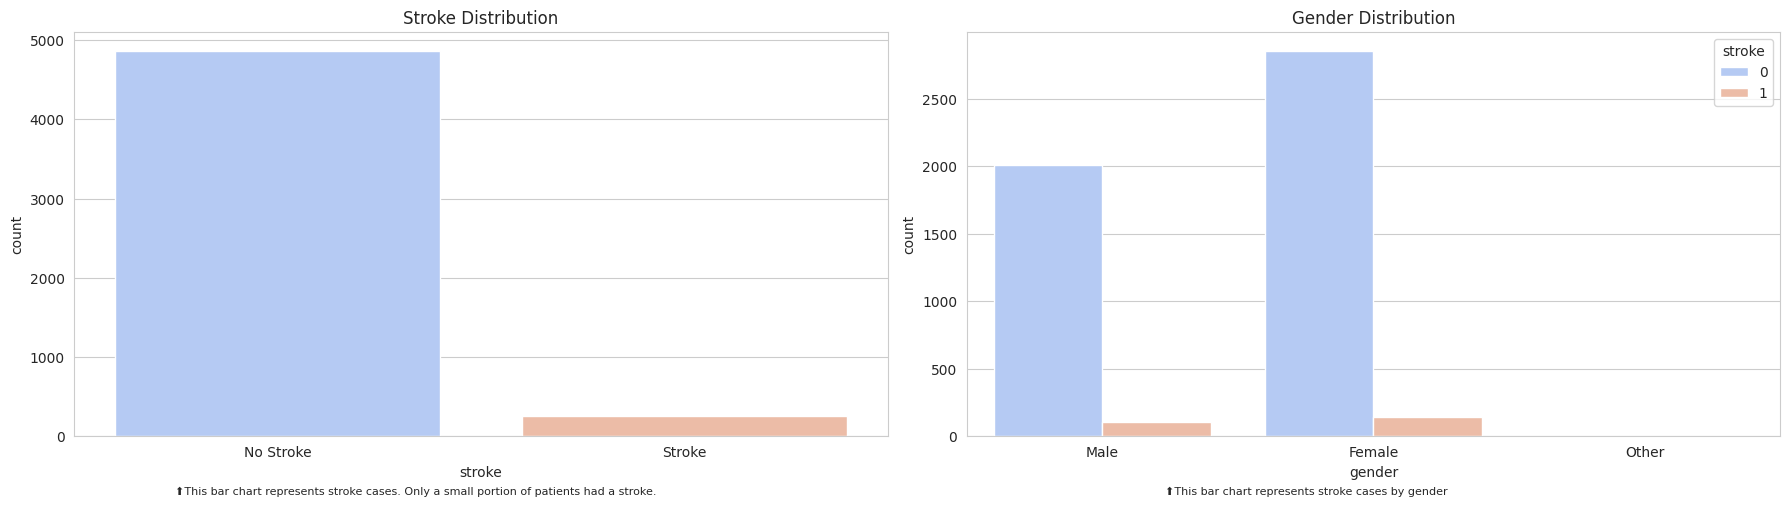

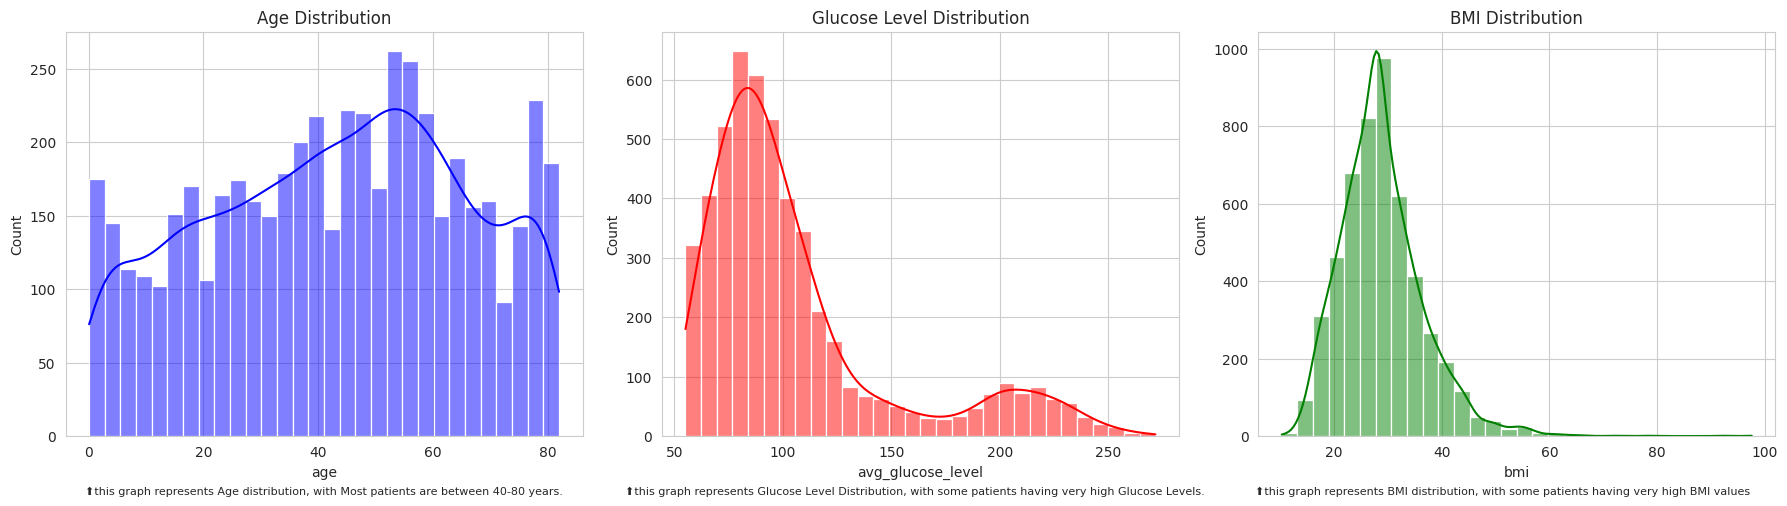

In [9]:
# Set seaborn style
sns.set_style("whitegrid")

# Plot Stroke and Gender Distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

#Stroke Count (Bar Chart)
sns.countplot(x="stroke", data=df, palette="coolwarm", ax=axes[0])
axes[0].set_title("Stroke Distribution")
axes[0].set_xticklabels(["No Stroke", "Stroke"])
plt.figtext(0.10,0.001, "⬆️This bar chart represents stroke cases. Only a small portion of patients had a stroke.", wrap=True, fontsize=8)

#Gender Count (Bar Chart)
sns.countplot(x="gender", data=df, palette="coolwarm", hue="stroke", ax=axes[1])
axes[1].set_title("Gender Distribution")
axes[1].set_xticklabels(["Male", "Female", "Other"])
plt.figtext(0.65,0.001, "⬆️This bar chart represents stroke cases by gender", wrap=True, fontsize=8)


plt.tight_layout()
plt.show()


# Plot Age, Glucose Level, and BMI Distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["age"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Age Distribution")
plt.figtext(0.05,0.001, "⬆️this graph represents Age distribution, with Most patients are between 40-80 years.", wrap=True, fontsize=8)

sns.histplot(df["avg_glucose_level"], bins=30, kde=True, ax=axes[1], color="red")
axes[1].set_title("Glucose Level Distribution")
plt.figtext(0.35,0.001, "⬆️this graph represents Glucose Level Distribution, with some patients having very high Glucose Levels.", wrap=True, fontsize=8)

sns.histplot(df["bmi"], bins=30, kde=True, ax=axes[2], color="green")
axes[2].set_title("BMI Distribution")
plt.figtext(0.70,0.001,"⬆️this graph represents BMI distribution, with some patients having very high BMI values", wrap=True, fontsize=8)

plt.tight_layout()
plt.show()



#Outlier Detection & Handling

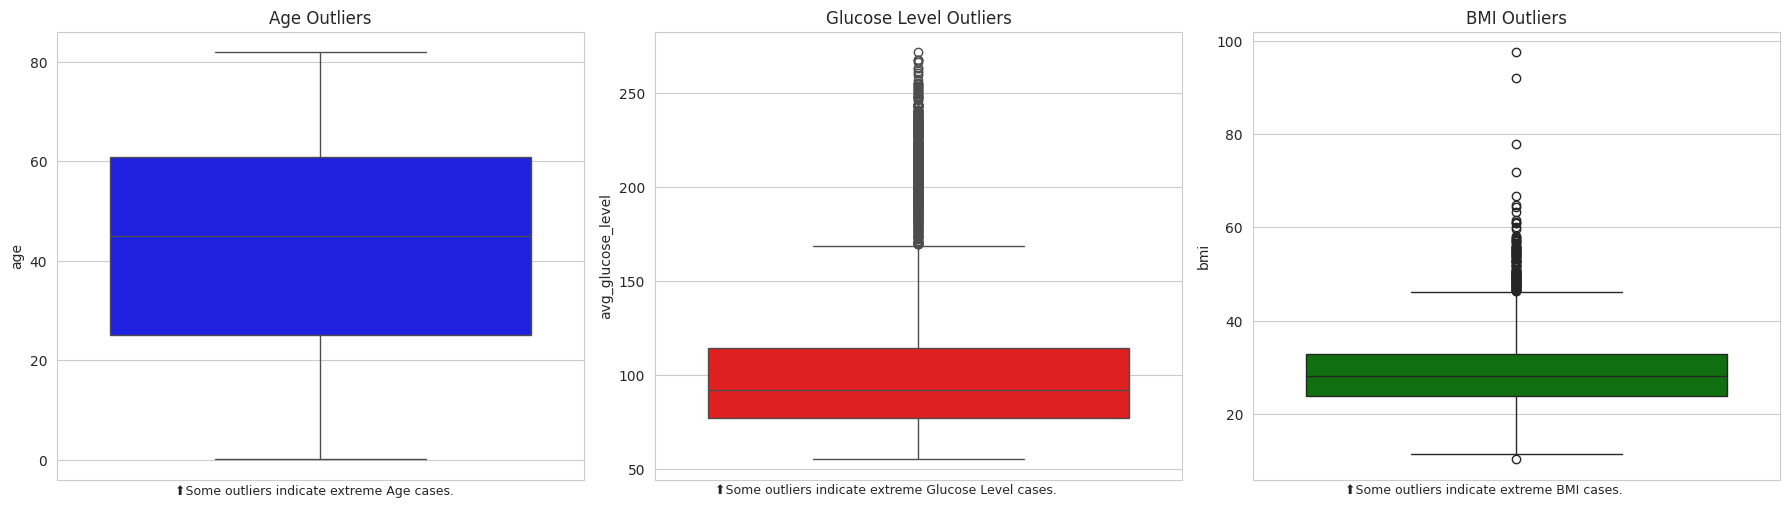

In [10]:
# Boxplot for Outlier Detection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=df["age"], ax=axes[0], color="blue")
axes[0].set_title("Age Outliers")
plt.figtext(0.10,0.001, "⬆️Some outliers indicate extreme Age cases.", wrap=True, fontsize=9)

sns.boxplot(y=df["avg_glucose_level"], ax=axes[1], color="red")
axes[1].set_title("Glucose Level Outliers")
plt.figtext(0.40,0.001, "⬆️Some outliers indicate extreme Glucose Level cases.", wrap=True, fontsize=9)

sns.boxplot(y=df["bmi"], ax=axes[2], color="green")
axes[2].set_title("BMI Outliers")
plt.figtext(0.75,0.001, "⬆️Some outliers indicate extreme BMI cases.", wrap=True, fontsize=9)

plt.tight_layout()
plt.show()



In [11]:
# Outlier Removal using IQR method
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal
df_cleaned = remove_outliers("bmi")
df_cleaned = remove_outliers("avg_glucose_level")
df_cleaned = remove_outliers("age")

# Display new shape after outlier removal
df_cleaned.shape


(5110, 12)

In [12]:
df_cleaned.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#***⚡Feature Engineering & Encoding***

In [13]:
# Encode categorical variables
label_encoders = {}
for col in ["gender","ever_married","Residence_type","work_type","smoking_status"]:
    df_cleaned[col] = df_cleaned[col].fillna("Unknown")  # Missing values को हटाएं
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Save encoder for later reference

print(df_cleaned.head())
print(df_cleaned.dtypes)


      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21  28.1               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1  
id                     int64
gender                 int64
age                  float64
hypertension      

# Correlation Heatmap (Only numerical features)

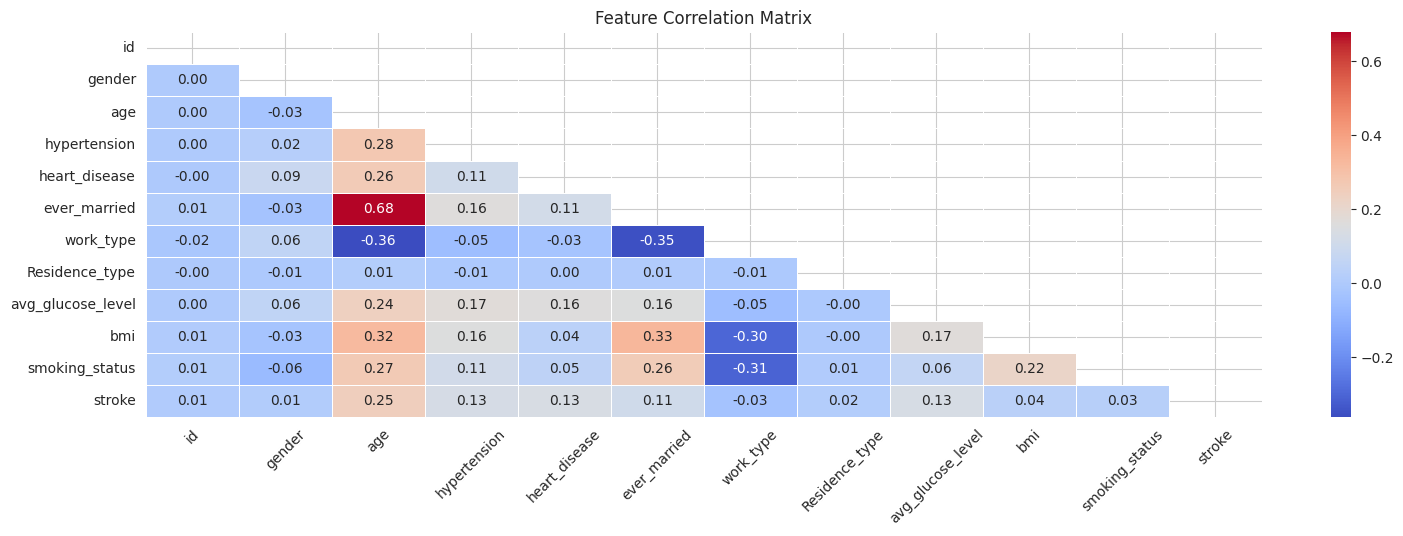

In [14]:
# This step executed after encoding the gender data and save it as 'df_cleaned"
# Correlation Heatmap (Only numerical features)
# Correlation matrix calculate karo
corr_matrix = df_cleaned.corr()

# Lower triangle mask create karo
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(18, 5))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)  # X-axis labels readable banane ke liye
plt.yticks(rotation=0)
plt.show()



In [15]:
# Drop all unnecessary columns based on correlation (not useful for analysis)
df_cleaned.drop(columns=["id","gender","ever_married","work_type","Residence_type",], inplace=True)

# Because of the correlation of these columns are very low with stroke that we can able to see in the graph that is given above in "Feature Correlation Matrix".

In [16]:
df_cleaned.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,228.69,36.6,1,1
1,61.0,0,0,202.21,28.1,2,1
2,80.0,0,1,105.92,32.5,2,1
3,49.0,0,0,171.23,34.4,3,1
4,79.0,1,0,174.12,24.0,2,1


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
x=df_cleaned.drop(columns=["stroke"])
y=df_cleaned["stroke"]

# fill split in train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)



In [27]:
# Standardize numerical features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [28]:
# Handle Imbalanced Data (if needed)
if y_train.value_counts().min() / y_train.value_counts().max() < 0.5:  # Check imbalance
    smote = SMOTE(random_state=42)
    x_train, y_train = smote.fit_resample(x_train, y_train)

In [29]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42)
}


In [30]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }


In [31]:
# Print results
for model, metrics in results.items():
    print(f"{model} Performance:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

Logistic Regression Performance:
  Accuracy: 0.7564
  Precision: 0.9453
  Recall: 0.7564
  F1 Score: 0.8249

Decision Tree Performance:
  Accuracy: 0.8699
  Precision: 0.9131
  Recall: 0.8699
  F1 Score: 0.8901

Random Forest Performance:
  Accuracy: 0.8865
  Precision: 0.9202
  Recall: 0.8865
  F1 Score: 0.9020

